<span style="font-family: Arial; font-weight:bold;font-size:2.1em;color:#fff;">-----------------------------------
    
<span style="font-family: Arial; font-weight:bold;font-size:2.1em;color:#fa9200;">Testing out Indicators across various Stocks to Validate
    
<span style="font-family: Arial; font-weight:bold;font-size:2.1em;color:#fff;">-----------------------------------

# Import Packages

In [16]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from datetime import date, datetime
import os
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.formula.api as sm
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import yfinance as yf
from scipy.signal import argrelextrema
from collections import defaultdict
import sqlite3
import Indicators
import Measurement

# Grab Data for Ticker

In [21]:
tickers = Indicators.save_sp500_tickers()
ticker = tickers[0]
ticker = 'PBR'
events = ['ihs_event','hs_event','fw_event','rw_event']
df = Indicators.get_ticker(ticker,500)
df

datetime    open   high     low    close   volume  \
0    2022-03-18 09:30:00-04:00  13.060  13.28  12.930  13.1300  6854830   
1    2022-03-18 10:30:00-04:00  13.130  13.25  13.115  13.1150  5842575   
2    2022-03-18 11:30:00-04:00  13.120  13.21  13.100  13.1850  3889174   
3    2022-03-18 12:30:00-04:00  13.185  13.35  13.180  13.3101  5099739   
4    2022-03-18 13:30:00-04:00  13.315  13.35  13.225  13.2450  1890557   
...                        ...     ...    ...     ...      ...      ...   
3484 2024-03-14 09:30:00-04:00  15.000  15.02  14.795  14.8300  6102126   
3485 2024-03-14 10:30:00-04:00  14.830  14.93  14.780  14.7885  5488699   
3486 2024-03-14 11:30:00-04:00  14.780  14.83  14.765  14.8150  1967897   
3487 2024-03-14 12:30:00-04:00  14.815  14.84  14.635  14.6600  3433043   
3488 2024-03-14 13:30:00-04:00  14.655  14.69  14.640  14.6895   630931   

      dividends  stock splits                date ticker  
0           0.0           0.0 2022-03-18 09:30:00    PBR  
1           0.0           0.0 2022-03-18 10:30:00    PBR  
2           0.0           0.0 2022-03-18 11:30:00    PBR  
3           0.0           0.0 2022-03-18 12:30:00    PBR  
4           0.0           0.0 2022-03-18 13:30:00    PBR  
...         ...           ...                 ...    ...  
3484        0.0           0.0 2024-03-14 09:30:00    PBR  
3485        0.0           0.0 2024-03-14 10:30:00    PBR  
3486        0.0           0.0 2024-03-14 11:30:00    PBR  
3487        0.0           0.0 2024-03-14 12:30:00    PBR  
3488        0.0           0.0 2024-03-14 13:30:00    PBR  

[3489 rows x 10 columns]

# Add SMA, Min/Max, Events

In [22]:
SMAs = [30,60,90]
smoothing = 10
window = 15

df = Indicators.get_sma(df,SMAs)
minmax = Indicators.get_max_min(df, smoothing, window)
invhs = Indicators.find_IHS(minmax).reset_index(drop=True)
rw = Indicators.find_RW(minmax,.03).reset_index(drop=True)
fw = Indicators.find_FW(minmax,.03).reset_index(drop=True)
df

datetime    open   high     low    close   volume  \
0    2022-03-18 09:30:00-04:00  13.060  13.28  12.930  13.1300  6854830   
1    2022-03-18 10:30:00-04:00  13.130  13.25  13.115  13.1150  5842575   
2    2022-03-18 11:30:00-04:00  13.120  13.21  13.100  13.1850  3889174   
3    2022-03-18 12:30:00-04:00  13.185  13.35  13.180  13.3101  5099739   
4    2022-03-18 13:30:00-04:00  13.315  13.35  13.225  13.2450  1890557   
...                        ...     ...    ...     ...      ...      ...   
3484 2024-03-14 09:30:00-04:00  15.000  15.02  14.795  14.8300  6102126   
3485 2024-03-14 10:30:00-04:00  14.830  14.93  14.780  14.7885  5488699   
3486 2024-03-14 11:30:00-04:00  14.780  14.83  14.765  14.8150  1967897   
3487 2024-03-14 12:30:00-04:00  14.815  14.84  14.635  14.6600  3433043   
3488 2024-03-14 13:30:00-04:00  14.655  14.69  14.640  14.6895   630931   

      dividends  stock splits                date ticker      SMA30  \
0           0.0           0.0 2022-03-18 09:30:00    PBR        NaN   
1           0.0           0.0 2022-03-18 10:30:00    PBR        NaN   
2           0.0           0.0 2022-03-18 11:30:00    PBR        NaN   
3           0.0           0.0 2022-03-18 12:30:00    PBR        NaN   
4           0.0           0.0 2022-03-18 13:30:00    PBR        NaN   
...         ...           ...                 ...    ...        ...   
3484        0.0           0.0 2024-03-14 09:30:00    PBR  14.935530   
3485        0.0           0.0 2024-03-14 10:30:00    PBR  14.872147   
3486        0.0           0.0 2024-03-14 11:30:00    PBR  14.876647   
3487        0.0           0.0 2024-03-14 12:30:00    PBR  14.877813   
3488        0.0           0.0 2024-03-14 13:30:00    PBR  14.864797   

          SMA60      SMA90  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
3484  15.771180  16.227818  
3485  15.739738  16.196523  
3486  15.708738  16.165079  
3487  15.675155  16.131634  
3488  15.642063  16.098018  

[3489 rows x 13 columns]

# Loop Thru Tickers to find FW

In [23]:
i = 0
fw = pd.DataFrame()
while len(rw)<1 and i<500:
    ticker = tickers[i]
    df = Indicators.get_ticker(ticker,500)
    df = Indicators.get_sma(df,SMAs)
    minmax = Indicators.get_max_min(df, smoothing, window)
    invhs = Indicators.find_IHS(minmax).reset_index(drop=True)
    hs = Indicators.find_HS(minmax).reset_index(drop=True)
    fw = Indicators.find_FW(minmax,.03).reset_index(drop=True)
    rw = Indicators.find_RW(minmax,.03).reset_index(drop=True)
    i += 1
fw

Empty DataFrame
Columns: []
Index: []

# Plot Data

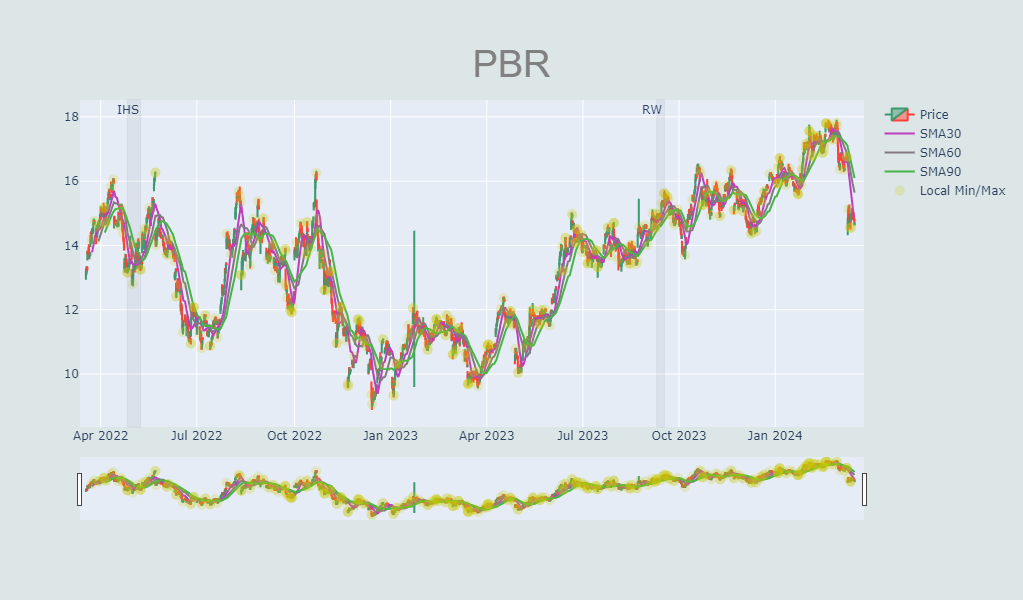

In [24]:
fig = go.Figure()
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'],
                name='Price')])
for n in SMAs:
    rgb = 'rgb({},{},{})'.format(250-n*2,n*2,250-n*2)
    fig.add_trace(go.Scatter(x=df['date'],
                y=df['SMA{}'.format(n)],
                mode='lines',
                name='SMA{}'.format(n),
                line=dict(color=rgb)))
fig.add_trace(go.Scatter(x=minmax['date'],
                y=minmax['close'],
                mode='markers',
                name='Local Min/Max',
                marker=dict(color='rgb(200,200,0)',
                            size=10,
                            opacity=0.2)
                        ))
# iterate through the shaded regions dataframe

for index, row in invhs.iterrows():
    
    # retrieve the dates
    start = row['start_event']
    end = row['end_event']

    # add shaded region
    fig.add_vrect(
            x0=start,
            x1=end,
            fillcolor="grey",
            opacity=0.1,
            line_width=1,
            annotation_text='IHS'
        )   
# iterate through the shaded regions dataframe
for index, row in fw.iterrows():
    
    # retrieve the dates
    start = row['start_event']
    end = row['end_event']

    # add shaded region
    fig.add_vrect(
            x0=start,
            x1=end,
            fillcolor="grey",
            opacity=0.1,
            line_width=1,
            annotation_text='FW'
        )  
for index, row in rw.iterrows():
    
    # retrieve the dates
    start = row['start_event']
    end = row['end_event']

    # add shaded region
    fig.add_vrect(
            x0=start,
            x1=end,
            fillcolor="grey",
            opacity=0.1,
            line_width=1,
            annotation_text='RW'
        )  
fig.update_xaxes(
        rangeslider_visible=True,
        rangebreaks=[
            # NOTE: Below values are bound (not single values), ie. hide x to y
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
            #dict(values=["2024-12-25", "2024-01-01","2024-01-15","2024-02-19"])  # hide holidays (Christmas and New Year's, etc)
        ]
    )
fig.update_layout(title={'text':ticker, 'xanchor':'center', 'yanchor':'top','x':0.5},
                height=600,
                title_font={"family":"arial","color":"gray","size":38},
                paper_bgcolor='rgb(220,230,230)'
                 )
fig.show()

# Testing out Toggle for Indicators

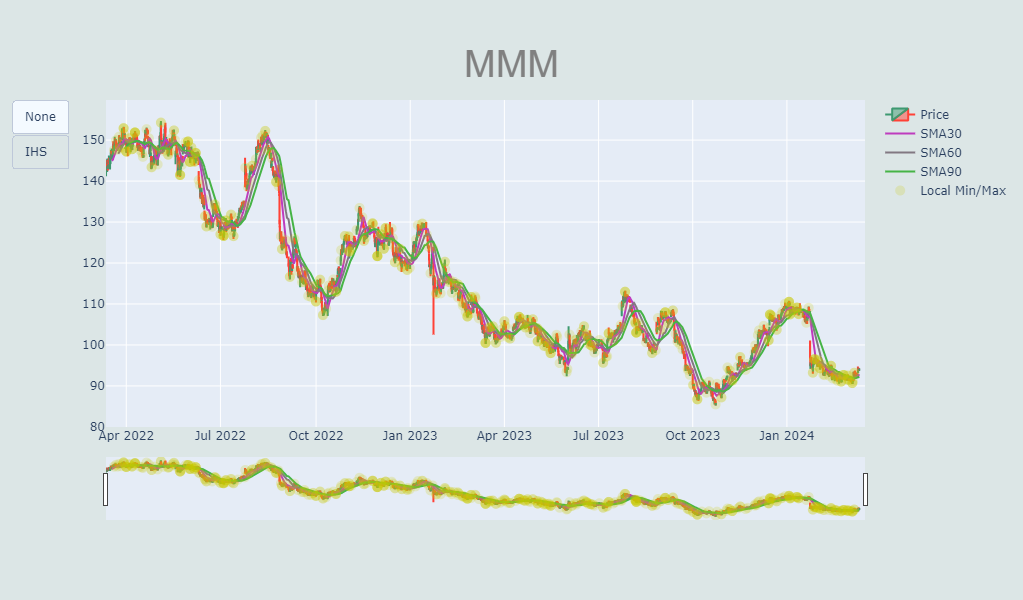

In [14]:
fig = go.Figure()
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'],
                name='Price')])
for n in SMAs:
    rgb = 'rgb({},{},{})'.format(250-n*2,n*2,250-n*2)
    fig.add_trace(go.Scatter(x=df['date'],
                y=df['SMA{}'.format(n)],
                mode='lines',
                name='SMA{}'.format(n),
                line=dict(color=rgb)))
fig.add_trace(go.Scatter(x=minmax['date'],
                y=minmax['close'],
                mode='markers',
                name='Local Min/Max',
                marker=dict(color='rgb(200,200,0)',
                            size=10,
                            opacity=0.2)
                        ))
# iterate through the shaded regions dataframe

hs_dict = {}
for index, row in invhs.iterrows():
    
    # retrieve the dates
    start = row['start_event']
    end = row['end_event']

    # add shaded region
    hs = [dict(type="vrect",
            x0=start,
            x1=end,
            fillcolor="grey",
            opacity=0.1,
            line_width=1,
            annotation_text='IHS'
        )]
    hs_dict[index]=hs
    
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=[
                dict(label="None",
                     method="relayout",
                     args=["shapes", []]),
                dict(label="IHS",
                     method="relayout",
                     args=["shapes", hs_dict[0]])
            ],
        )
    ]
)
fig.update_xaxes(
        rangeslider_visible=True,
        rangebreaks=[
            # NOTE: Below values are bound (not single values), ie. hide x to y
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
            #dict(values=["2024-12-25", "2024-01-01","2024-01-15","2024-02-19"])  # hide holidays (Christmas and New Year's, etc)
        ]
    )
fig.update_layout(title={'text':ticker, 'xanchor':'center', 'yanchor':'top','x':0.5},
                height=600,
                title_font={"family":"arial","color":"gray","size":38},
                paper_bgcolor='rgb(220,230,230)'
                 )
fig.show()

# Zoom in on Specific Event

In [45]:
df2 = Indicators.main(ticker,500,SMAs,smoothing,window)

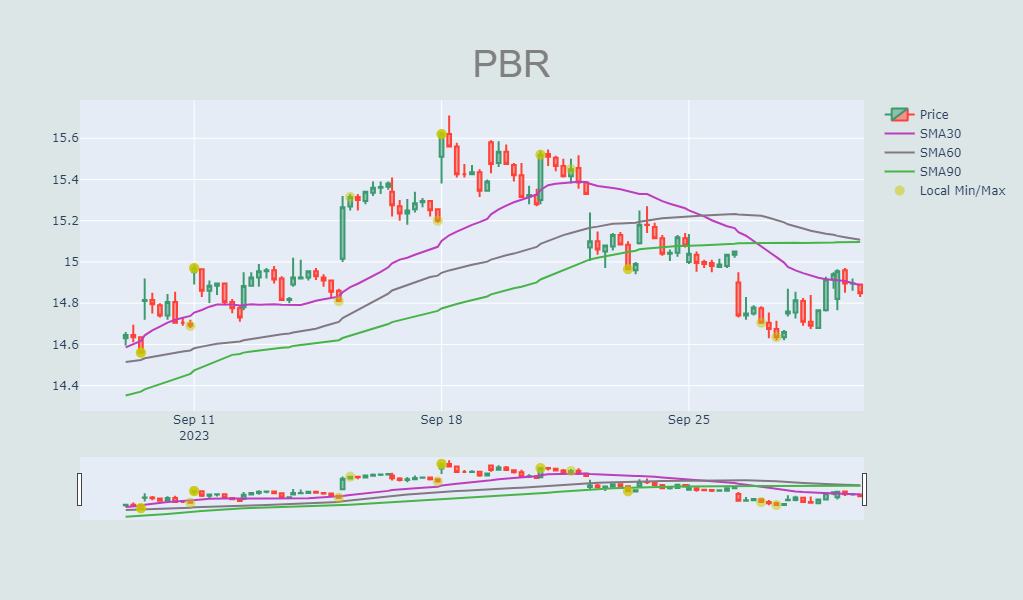

In [46]:
eventType = 'rw_event'
ID = list(df2[df2.date==df2[df2[eventType]==1].date.min()].index)[0]
chartdf = df2.iloc[ID-10:ID+95].copy()
minmax2 = minmax[(minmax.date>=chartdf.date.min())&(minmax.date<=chartdf.date.max())].copy()
fig = go.Figure()
fig = go.Figure(data=[go.Candlestick(x=chartdf['date'],
                open=chartdf['open'],
                high=chartdf['high'],
                low=chartdf['low'],
                close=chartdf['close'],
                name='Price')])
for n in SMAs:
    rgb = 'rgb({},{},{})'.format(250-n*2,n*2,250-n*2)
    fig.add_trace(go.Scatter(x=chartdf['date'],
                y=chartdf['SMA{}'.format(n)],
                mode='lines',
                name='SMA{}'.format(n),
                line=dict(color=rgb)))
fig.add_trace(go.Scatter(x=minmax2['date'],
                y=minmax2['close'],
                mode='markers',
                name='Local Min/Max',
                marker=dict(color='rgb(200,200,0)',
                            size=10,
                            opacity=0.5)
                        ))
fig.update_xaxes(
        rangeslider_visible=True,
        rangebreaks=[
            # NOTE: Below values are bound (not single values), ie. hide x to y
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
            #dict(values=["2024-12-25", "2024-01-01","2024-01-15","2024-02-19"])  # hide holidays (Christmas and New Year's, etc)
        ]
    )
fig.update_layout(title={'text':ticker, 'xanchor':'center', 'yanchor':'top','x':0.5},
                height=600,
                title_font={"family":"arial","color":"gray","size":38},
                paper_bgcolor='rgb(220,230,230)'
                 )
fig.show()

# Build Inidcators and Group by Change During Event

In [5]:
M = 45
df3 = pd.DataFrame()
for ticker in tickers:
    try:
        df2 = Indicators.main(ticker,500,SMAs,smoothing,window)
        df2 = Measurement.Measure_event(df2,events,N=M)
        df2 = Measurement.get_changes(df2,N=M)
        df3 = pd.concat([df2,df3])
    except Exception as e: 
        print(e)
    
df3.groupby([x for x in df3.columns if '_event' in x]).lower_chng.mean().reset_index()

BRK.B: No data found, symbol may be delisted
'DataFrame' object has no attribute 'Datetime'
BF.B: Period '500d' is invalid, must be one of ['1mo', '3mo', '6mo', 'ytd', '1y', '2y', '5y', '10y', 'max']
'DataFrame' object has no attribute 'Datetime'


C:\Users\rschaub\Anaconda3\lib\site-packages\yfinance\utils.py:613: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub_missing[list(keys)] = _np.nan
C:\Users\rschaub\Anaconda3\lib\site-packages\yfinance\utils.py:613: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub_missing[list(keys)] = _np.nan
C:\Users\rschaub\Anaconda3\lib\site-packages\yfinance\utils.py:613: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

fw_event  rw_event  ihs_event  hs_event  lower_chng
0         -2         0         -1         0   -0.018166
1         -2         0         -1         1   -0.001702
2         -2         0          0         0   -0.020504
3         -2         0          0         1   -0.009078
4         -2         0          1         0   -0.002178
..       ...       ...        ...       ...         ...
66         1         0          0         1   -0.034728
67         1         0          1        -1   -0.014868
68         1         0          1         0   -0.022372
69         1         0          1         1   -0.018834
70         1         1          0         0   -0.004989

[71 rows x 5 columns]

In [44]:
event = 'rw_event'
final = df3.groupby(['ticker',event]).lower_chng.describe().reset_index()
#final[event] = np.where(final[event] == 0, "Outside Event", "After Event")
final2 = pd.pivot_table(final[(final.ticker.isin(final[final[event].isin([-2])].ticker))&(final[event].isin([-2,0]))],
               values = ['count','50%'], 
               index = ['ticker'],
               columns = [event],
               aggfunc = 'mean'
              )
final2.columns = [str(x) + str(y) for x,y in final2.columns]
final2['Indicator'] = np.where(final2['50%-2'] < final2['50%0'], 1, 0)
final2['Indicator'].mean()
#final2 = final[(final.ticker.isin(final[final[event].isin([-2])].ticker))&(final[event].isin([-2,0]))].copy()
#final2[final2.ticker.str.match('^M.*')]

0.6518771331058021